### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [9]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


(0.095524544464449537, 2.5184020037371422)

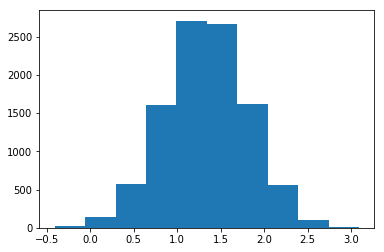

In [17]:
diff = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_old = bootsample[bootsample.drinks_coffee == True].height.mean()
    mean_young = bootsample[bootsample.drinks_coffee == False].height.mean()
    diff.append(mean_old - mean_young)
plt.hist(diff);
np.percentile(diff, 0.5), np.percentile(diff, 99.5)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [10]:
diff = []
for _ in range(10000):
    bootsample = sample_data.sample(200)
    mean_old = bootsample[bootsample.age == '>=21'].height.mean()
    mean_young = bootsample[bootsample.age == '<21'].height.mean()
    diff.append(mean_old - mean_young)

(4.2486286959680939, 4.2486286959681507)

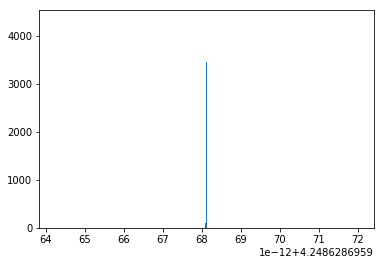

In [12]:
plt.hist(diff);
np.percentile(diff, 0.5), np.percentile(diff, 99.5)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

(-1.8493493676082622, -1.8493493676082196)

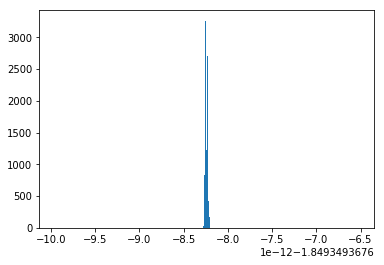

In [20]:
diff = []
for _ in range(10000):
    bootsample = sample_data.sample(200)
    mean_old = bootsample.query('age == "<21" & drinks_coffee == True').height.mean()
    mean_young = bootsample.query('age == "<21" & drinks_coffee == False').height.mean()
    diff.append(mean_old - mean_young)
plt.hist(diff);
np.percentile(diff, 2.5), np.percentile(diff, 97.5)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

(-3.1148164036658557, -3.114816403665813)

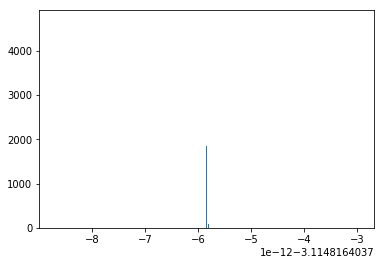

In [21]:
diff = []
for _ in range(10000):
    bootsample = sample_data.sample(200)
    mean_old = bootsample.query('age == ">=21" & drinks_coffee == True').height.mean()
    mean_young = bootsample.query('age == ">=21" & drinks_coffee == False').height.mean()
    diff.append(mean_old - mean_young)
plt.hist(diff);
np.percentile(diff, 2.5), np.percentile(diff, 97.5)